#Additional Exercesis

#Exercises 5. TF-IDF + cosine similarity

- Pick 5 documents
- Compute TF-IDF vector for each documents
- Find the most similar pair of documents (cosine similarity)
- Print 3 words that has highest TF-IDF for each documents

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import math
import numpy as np
import re
#Pick 5 documents
Documents = ["The quick brown fox jumps over the lazy dog.",
             "A fast brown dog outpaces the quick fox.",
             "The lazy dog lies under the old tree.",
             "Foxes are clever animals often seen in the forest.",
             "Some dogs are lazy but friendly and loyal."]

#Compute TF-IDF for each documents from scratch
def compute_TF_IDF(Documents):
  tokenized_documents = [re.findall(r'\b\w+\b', doc.lower()) for doc in Documents]
  unique_words_map_index = {}
  index = 0
  vocabulary = []

  for doc in tokenized_documents:
    for word in doc:

      if word not in unique_words_map_index:
        unique_words_map_index[word] = index
        vocabulary.append(word)
        index += 1

  Count_matrix = [[0] * len(unique_words_map_index) for _ in range(len(Documents))]

  for doc_index, doc in enumerate(tokenized_documents):
    for word in doc:
      word_index = unique_words_map_index[word]
      Count_matrix[doc_index][word_index] += 1

  TF_matrix = [[0] * len(unique_words_map_index) for _ in range(len(Documents))]
  num_documents = len(Documents)
  words_sum_per_doc = [sum(doc) for doc in Count_matrix]

  for word, word_index in unique_words_map_index.items():
    df = 0

    for doc_index in range(num_documents):
      if Count_matrix[doc_index][word_index] > 0:
        df += 1

    for doc_index in range(num_documents):
      count = Count_matrix[doc_index][word_index]

      if count == 0:
        continue

      tf = math.log(count / words_sum_per_doc[doc_index]) + 1

      if df == 0:
        idf = 0
      else:
        idf = math.log(num_documents / (df + 1))
      TF_matrix[doc_index][word_index] = tf * idf

  return TF_matrix, vocabulary

tf_idf_matrix, vocabulary = compute_TF_IDF(Documents)
print(compute_TF_IDF(Documents))

([[-0.0, -0.611572991505749, -0.611572991505749, -0.611572991505749, -1.0970057841851306, -1.0970057841851306, -0.2671529439074578, -0.2671529439074578, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.0, -0.5514063988475247, -0.5514063988475247, -0.5514063988475247, 0, 0, 0, -0.24087041904652412, -0.989082280241183, -0.989082280241183, -0.989082280241183, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.0, 0, 0, 0, 0, 0, -0.24087041904652412, -0.24087041904652412, 0, 0, 0, -0.989082280241183, -0.989082280241183, -0.989082280241183, -0.989082280241183, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.0970057841851306, -0.611572991505749, -1.0970057841851306, -1.0970057841851306, -1.0970057841851306, -1.0970057841851306, -1.0970057841851306, -1.0970057841851306, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, -0.24087041904652412, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.5514063988475247, 0, 0, 0, 0, 0, 0, -0.989082280241183, -0.9890

In [2]:

#Compute cosine similarity and output k-most similar documents
def cosine_similarity(tf_idf_matrix, k = 1):
  num_documents = len(tf_idf_matrix)
  pairs = []
  cosine = []
  for i in range(num_documents):
    for j in range(i + 1, num_documents):
      vector_i = np.array(tf_idf_matrix[i])
      vector_j = np.array(tf_idf_matrix[j])
      pairs.append((i, j))
      cosine.append(np.dot(vector_i, vector_j) / (np.linalg.norm(vector_i) * np.linalg.norm(vector_j)))

  pairs_sorted = [x for _, x in sorted(zip(cosine, pairs), key=lambda x: x[0], reverse=True)]
  cosine.sort(reverse = True)
  return pairs_sorted[:k], cosine[:k]

cosine_similarity(tf_idf_matrix, 1)


([(0, 1)], [np.float64(0.2841713659304737)])

In [3]:
#Print 3 words with highest tf-idf scores
def get_best_words(tf_idf_matrix, vocabulary, k = 3):
  """
  Get k words with highest TF-IDF in each documents
  ------------
  Parammeters:

  tf_idf_matrix: The matrix of TF-IDF scores
  index_mapping_words: The dictionary contains indices with its corresponding words
  ---------

  Return:

  Words in each documents that has the highest TF-IDF scores
  """
  vocab_size = len(tf_idf_matrix[0])
  num_documents = len(tf_idf_matrix)
  indices = list(range(vocab_size))
  words = []
  for document in tf_idf_matrix:
    descending = [x[1] for x in sorted(zip(document, indices), reverse = True)]
    words.append([vocabulary[i] for i in descending[:k]])
  return words

tf_idf_matrix, vocabulary = compute_TF_IDF(Documents)
words = get_best_words(tf_idf_matrix, vocabulary)
words

[['loyal', 'and', 'friendly'],
 ['loyal', 'and', 'friendly'],
 ['loyal', 'and', 'friendly'],
 ['loyal', 'and', 'friendly'],
 ['forest', 'in', 'seen']]

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Documents
Documents = [
    "The quick brown fox jumps over the lazy dog.",
    "A fast brown dog outpaces the quick fox.",
    "The lazy dog lies under the old tree.",
    "Foxes are clever animals often seen in the forest.",
    "Some dogs are lazy but friendly and loyal."
]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(Documents)
feature_names = vectorizer.get_feature_names_out()

# Cosine Similarity Matrix
cos_sim = cosine_similarity(tfidf_matrix)

# Find most similar pair (excluding diagonal)
max_sim = -1
pair = (None, None)

for i in range(len(Documents)):
    for j in range(i + 1, len(Documents)):
        if cos_sim[i][j] > max_sim:
            max_sim = cos_sim[i][j]
            pair = (i, j)

print("Most similar documents are:")
print(f"Document {pair[0]} and Document {pair[1]} with cosine similarity = {max_sim:.4f}")
print()

# Top 3 TF-IDF words per document
print("Top 3 words with highest TF-IDF in each document:")
for idx, row in enumerate(tfidf_matrix.toarray()):
    top3_idx = row.argsort()[-3:][::-1]
    top3_words = [feature_names[i] for i in top3_idx]
    print(f"Document {idx}: {top3_words}")

Most similar documents are:
Document 0 and Document 1 with cosine similarity = 0.5650

Top 3 words with highest TF-IDF in each document:
Document 0: ['the', 'over', 'jumps']
Document 1: ['outpaces', 'fast', 'fox']
Document 2: ['the', 'under', 'tree']
Document 3: ['often', 'seen', 'foxes']
Document 4: ['some', 'loyal', 'and']


##Exercise 6: PPMI matrix + visualization
- Create a co-occurence matrix for each document
- Compute PPMI matrix
- Use SVD to reduce the dimension into 2
- Plot the words

In [5]:
import math
import numpy as np
import re
Documents = ["The quick brown fox jumps over the lazy dog.",
             "A fast brown dog outpaces the quick fox.",
             "The lazy dog lies under the old tree.",
             "Foxes are clever animals often seen in the forest.",
             "Some dogs are lazy but friendly and loyal."]

#Create PPMI matrix
def PPMI_Matrix(Documents, window_size = 2):
  tokenized_documents = [re.findall(r'\b\w+\b', doc.lower()) for doc in Documents]
  unique_words_map_index = {}
  index = 0
  vocabulary = []

  for doc in tokenized_documents:
    for word in doc:

      if word not in unique_words_map_index:
        unique_words_map_index[word] = index
        vocabulary.append(word)
        index += 1

  vocabulary_size = len(vocabulary)
  total = 0

  count_matrix = [[0] * vocabulary_size for _ in range(vocabulary_size)]
  for tokenized_document in tokenized_documents:

    for word_index, word in enumerate(tokenized_document):
      left = max(word_index - window_size, 0)
      right = min(word_index + window_size, len(tokenized_document))

      for context_index in range(left, right):
        if context_index == word_index:
          continue
        count_matrix[context_index][word_index] += 1
        total += 1

  #Get the total times of the particular context appearing with a word
  context_counts = [sum(context) for context in count_matrix]

  #Get the total times of the particular word appearing in a context
  word_counts = [sum(col) for col in zip(*count_matrix)]

  PPMI_matrix = [[0] * vocabulary_size for _ in range(vocabulary_size)]
  #Compute the probabilities
  for context_index in range(vocabulary_size):
    p_c = context_counts[context_index] / total
    for word_index in range(vocabulary_size):

      p_wc = count_matrix[context_index][word_index] / total
      p_w = word_counts[word_index] / total

      if p_wc == 0:
        PPMI_matrix[context_index][word_index] = 0
      else:
        PPMI_matrix[context_index][word_index] = max(math.log(p_wc / (p_w * p_c)), 0)

  return PPMI_matrix, vocabulary

PPMI_matrix, vocabulary = PPMI_Matrix(Documents, window_size = 2)
print(PPMI_matrix)

[[0, 1.667706820558076, 1.262241712449912, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1.955388893009857, 0, 0.8567766043417476, 0.8567766043417476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1.262241712449912, 0, 0.8567766043417476, 0.8567766043417476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.8567766043417476, 0, 0.8567766043417476, 0.8567766043417476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.8567766043417476, 0, 0.8567766043417476, 0.8567766043417476, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.8567766043417476, 0, 0.8567766043417476, 1.0799201556559572, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1.0799201556559572, 0, 1.303063706970167, 1.4853852637641214, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1.6189166563886443, 0,

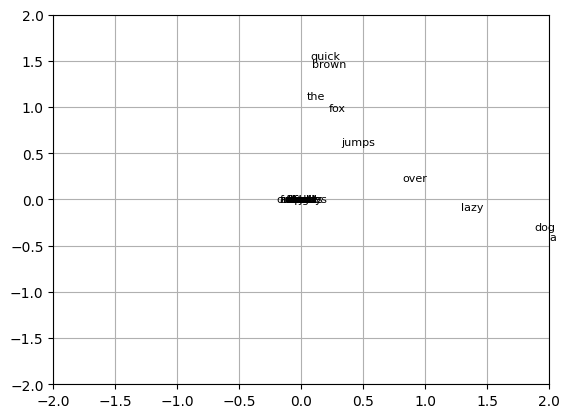

In [6]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

vocabulary_size = len(vocabulary)
transposed = np.array(PPMI_matrix).T
svd = TruncatedSVD(n_components = 2)
reduced_words = svd.fit_transform(transposed)

for i in range(vocabulary_size):
  word = vocabulary[i]
  x, y = reduced_words[i]
  plt.text(x, y, word, fontsize=8, ha='center', va='center')

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()



#Exercises 7: Word analogies with GloVe
- Download GloVe (glove6b.100d.txt)
- Compute: king - man + woman
- Print top 5 most similar words

In [7]:

import numpy as np

#Load gloVe (You must download them from the Stanford official websites)
def load_glove(path = "/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt"):
  dictionary = {}

  with open(path, "r") as file:
    for line in file:
      splitted_line = line.split()
      word = splitted_line[0]
      vector = np.asarray(splitted_line[1:], dtype='float32')
      dictionary[word] = vector

  return dictionary

#Computing king - man + woman

dictionary = load_glove()
king = dictionary["king"]
man = dictionary["man"]
woman = dictionary["woman"]
value = king - man + woman

print("king - man + woman = ", value)
print()

def get_most_similar_words(dictionary, vector, k = 1, return_best_values = False):
  words = list(dictionary.keys())
  cosine_similarities = [np.dot(vector, candidate) for candidate in dictionary.values()]
  sorted_names = sorted(zip(cosine_similarities, words), reverse = True)

  best_words = [sorted_names[i][1] for i in range(k)]
  best_values = [sorted_names[i][0] for i in range(k)]

  if return_best_values == True:
    return best_words, best_values
  else:
    return best_words

print("Top 5 most similar words: ", get_most_similar_words(dictionary, value, k = 5))



king - man + woman =  [-0.10231996 -0.81294006  0.10211003  0.985924    0.34218282  1.09095
 -0.48912996 -0.05616698 -0.21029997 -1.02996    -0.86851     0.36786997
  0.01960999  0.59259    -0.23190099 -1.016919   -0.01218399 -1.17194
 -0.52329     0.60645    -0.98537004 -1.001028    0.48913902  0.630072
  0.58224     0.15908998  0.43685    -1.25351     0.97054    -0.065529
  0.733763    0.44219002  1.2091839   0.19698    -0.15948     0.34364003
 -0.46222997  0.33772     0.14792705 -0.24959502 -0.77093005  0.522717
 -0.1283     -0.91881    -0.01755001 -0.44041002 -0.52656496  0.33734798
  0.60639    -0.45067    -0.04158002  0.08408299  1.31456     0.67737997
 -0.24316001 -2.071      -0.60648996  0.19710997  0.63567     0.07819998
  0.49161002  0.08171999  0.70855707  0.201938    0.5155501  -0.23025298
 -0.40473002  0.39212003 -0.5093     -0.139153    0.21609999 -0.628671
  0.08894002  0.49167    -0.06637001  0.76095    -0.19442001  0.41131002
 -1.04476    -0.14801991 -0.09835501 -0.251

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Exercises 8: Classify with TF-IDF vs PPMI
- Get Binary dataset
- Represent each documents by:
  *   TF-IDF
  *   PPMI
- Use Logistic regression to classify
- Compute accuracy and F1-score



In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score


data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MovieReviewTrainingDatabase.csv")
X, y = data["review"][:2000], data["sentiment"][:2000]

In [10]:
def data_preprocessing(X, y):
  label_encoder = LabelEncoder()
  y = label_encoder.fit_transform(y)


  #Load only half the data due to limited resources
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  return (X_train, y_train), (X_test, y_test)

In [11]:
#TF-IDF
tf_idf_matrix, vocabulary = compute_TF_IDF(X)
estimator1 = LogisticRegression(max_iter=10)

tf_idf_train_data, tf_idf_test_data = data_preprocessing(tf_idf_matrix, y)
X_train_tfidf, y_train_tfidf = tf_idf_train_data
print(y_train_tfidf)
X_test_tfidf, y_test_tfidf = tf_idf_test_data

estimator1.fit(X_train_tfidf, y_train_tfidf)
preds = estimator1.predict(X_test_tfidf)

print("TF_IDF accuracy: ", accuracy_score(preds, y_test_tfidf))
print("TF_IDF f1_score: ", f1_score(preds, y_test_tfidf))

#PPMI
def PPMIVectorizer(Documents):
  PPMI_matrix, vocabulary = PPMI_Matrix(Documents)
  word_map_index = {vocabulary[i]:i for i in range(len(vocabulary))}
  transposed_PPMI_matrix = np.array(PPMI_matrix).T
  vocabulary_size = len(vocabulary)
  vectorized_documents = []


  tokenized_documents = [re.findall(r'\b\w+\b', doc.lower()) for doc in Documents]
  for document in tokenized_documents:
    representation_vector = np.zeros(shape = (vocabulary_size))

    for token in document:
      token_index = word_map_index[token]
      representation_vector += transposed_PPMI_matrix[token_index]

    representation_vector /= len(document)
    vectorized_documents.append(representation_vector)

  return np.array(vectorized_documents)

X_PPMI = PPMIVectorizer(X)

PPMI_train_data, PPMI_test_data = data_preprocessing(X_PPMI, y)
X_train_PPMI, y_train_PPMI = PPMI_train_data
X_test_PPMI, y_test_PPMI = PPMI_test_data
estimator2 = LogisticRegression(max_iter = 10)

estimator2.fit(X_train_PPMI, y_train_PPMI)
preds = estimator2.predict(X_test_PPMI)

print("PPMI accuracy: ", accuracy_score(preds, y_test_PPMI))
print("PPMI f1_score: ", f1_score(preds, y_test_PPMI))



[0 1 1 ... 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TF_IDF accuracy:  0.8383333333333334
TF_IDF f1_score:  0.8375209380234506
PPMI accuracy:  0.7283333333333334
PPMI f1_score:  0.7392
